# Setup

In [1]:
import sys

sys.path.append("..")
import torch as th
from pathlib import Path

_ = th.set_grad_enabled(False)

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

# Offline Dashboard

**Note that if you plan to only run the online dashboard, you might want to switch to a non-gpu runtime.**

In [3]:
from tools.cc_utils import get_available_models
from IPython.display import Markdown

models = get_available_models()
# Display available CrossCoder models
models_md = "\n".join([f"- {model}" for model in models])
display(Markdown(f"## Available CrossCoders:\n{models_md}"))

## Available CrossCoders:
- gemma-2-2b-crosscoder-l13-mu4.1e-02-lr1e-04
- gemma-2-2b-L13-mu5.2e-02-lr1e-04-2x100M-local-shuffling-SAELoss
- gemma-2-2b-L13-k100-lr1e-04-local-shuffling-CCLoss
- gemma-2-2b-L13-k100-lr1e-04-local-shuffling-SAELoss
- SAE-difference-gemma-2-2b-L13-k100-lr1e-04-local-shuffling
- SAE-chat-gemma-2-2b-L13-k100-lr1e-04-local-shuffling
- gemma-2-2b-L13-k100-lr1e-04-local-shuffling-Decoupled
- Meta-Llama-3.1-8B-L16-mu2.0e-02-lr1e-04-local-shuffling-CCLoss
- Meta-Llama-3.1-8B-L16-k222-lr1e-04-local-shuffling-Crosscoder
- Meta-Llama-3.1-8B-L16-k222-lr1e-04-local-shuffling-Decoupled

In [4]:
l1_crosscoder = "gemma-2-2b-crosscoder-l13-mu4.1e-02-lr1e-04"
btopk_crosscoder = (
    "gemma-2-2b-L13-k100-lr1e-04-local-shuffling-CCLoss"  # the topk from the paper
)
decoupled_btopk_crosscoder = "gemma-2-2b-L13-k100-lr1e-04-local-shuffling-Decoupled"
sae = "SAE-chat-gemma-2-2b-L13-k100-lr1e-04-local-shuffling"
crosscoder = sae

⚠️ Norm diff is from 0 = chat only to 1 = base only which is the opposite of the paper ⚠️

In [10]:
from tools.utils import load_latent_df

df = load_latent_df(crosscoder)
if not crosscoder.startswith("SAE"):
    head = df.sort_values(by="dec_norm_diff").head(10)
else:
    head = df.sort_values(by="beta_activation_ratio", ascending=True).head(10)
head

feature_df.csv:   0%|          | 0.00/41.2M [00:00<?, ?B/s]

,lmsys_ctrl_%,lmsys_bos_%,lmsys_user_%,lmsys_assistant_%,lmsys_freq,lmsys_ctrl_freq,lmsys_non_ctrl_freq,lmsys_bos_freq,lmsys_assistant_freq,lmsys_user_freq,...,lmsys_ctrl_4_%,lmsys_ctrl_5_%,lmsys_ctrl_6_%,lmsys_ctrl_7_%,lmsys_ctrl_8_%,lmsys_ctrl_9_%,lmsys_ctrl_10_%,beta_activation_chat,beta_activation_base,beta_activation_ratio
latent,,,,,,,,,,,,,,,,,,,,,
45992,0.330361,0.0,0.583786,0.416214,0.006759,0.041137,0.004786,0.0,0.002697,0.010513,...,0.208261,0.490975,0.000000,0.000000,0.000000,0.000347,0.295470,0.247029,-0.554078,-2.242969
46730,0.981067,0.0,0.666667,0.333333,0.000338,0.006104,0.000007,0.0,0.000003,0.000017,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.105804,-0.545434,-0.493246
40718,0.001615,0.0,0.753557,0.246443,0.005279,0.000157,0.005573,0.0,0.001860,0.015801,...,0.000000,0.590909,0.386364,0.000000,0.000000,0.000000,0.000000,1.633454,-0.582210,-0.356429
640,0.965155,0.0,0.012165,0.987835,0.000979,0.017402,0.000036,0.0,0.000991,0.000034,...,0.171692,0.000000,0.021744,0.000000,0.000000,0.705846,0.028718,1.836317,-0.642181,-0.349712
47495,0.000986,0.0,0.685757,0.314243,0.001571,0.000029,0.001660,0.0,0.000706,0.004283,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.750000,1.382265,-0.461897,-0.334160
5041,0.018016,0.0,0.178900,0.821100,0.414846,0.137700,0.430752,0.0,0.480686,0.291033,...,0.097395,0.108153,0.058561,0.084822,0.113156,0.206273,0.108827,0.508714,-0.157415,-0.309438
62952,0.987030,0.0,0.258427,0.741573,0.001330,0.024177,0.000018,0.0,0.000018,0.000018,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.339120,-1.053558,-0.197328
9508,0.850672,0.0,0.022561,0.977439,0.000389,0.006101,0.000061,0.0,0.000409,0.000026,...,0.005266,0.000000,0.014043,0.000585,0.000000,0.706261,0.069631,3.245495,-0.534846,-0.164796
69650,0.966437,0.0,0.237443,0.762557,0.001264,0.022510,0.000045,0.0,0.000046,0.000040,...,0.001586,0.001427,0.001586,0.920552,0.072946,0.000000,0.000476,1.885372,-0.261995,-0.138962


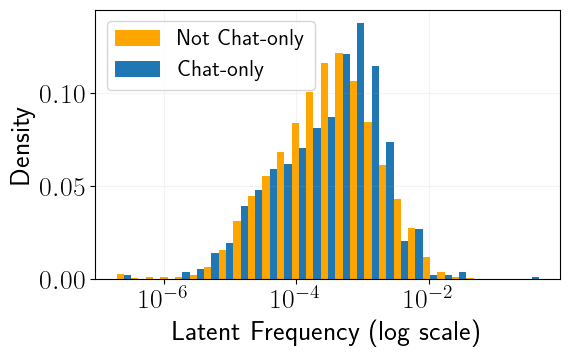

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
if crosscoder.startswith("SAE"):
    df["tag"] = "Not Chat only"
    df["tag"] = df["tag"].mask((df["beta_activation_ratio"] < 0.3) & (df["beta_activation_ratio"] > -0.3), "Chat only")
def frequency_plot(df: pd.DataFrame):
    if "tag" not in df.columns or "lmsys_freq" not in df.columns:
        print("Error: tag or lmsys_freq not found in df")
        return
    # Get unique tags for grouping
    tags = df["tag"].unique()

    # Create figure
    fig = plt.figure(figsize=(6, 3.5))
    ax = fig.add_subplot(111)

    # Colors matching the other plot
    colors = {
        "Chat only": "C0",
        "Base only": "C1",
        "Shared": "C2",
        "Other": "darkgray",
        "Not Chat only": "orange",
    }

    # Apply log transformation to frequency data
    all_freqs = np.concatenate(
        [
            np.log10(
                df[(df["tag"] == tag) & (df["lmsys_freq"] > 1e-8)]["lmsys_freq"] + 1e-10
            )
            for tag in tags
        ]
    )

    # Determine bin edges in log space
    bins = np.linspace(min(all_freqs), max(all_freqs), 30)
    bin_width = bins[1] - bins[0]

    # Calculate bar width and offsets
    n_tags = len(tags)
    single_bar_width = bin_width / (n_tags)  # Add 1 for spacing
    offsets = np.linspace(
        -bin_width / 2 + single_bar_width / 2,
        bin_width / 2 - single_bar_width / 2,
        n_tags,
    )

    # Plot histogram for each tag
    for tag, offset in zip(tags, offsets):
        tag_data = df[df["tag"] == tag]
        # Apply log transformation to the data
        log_freqs = np.log10(
            tag_data["lmsys_freq"] + 1e-10
        )  # Add small constant to avoid log(0)
        counts, _ = np.histogram(log_freqs, bins=bins)
        normalized_counts = counts / counts.sum()
        bin_centers = (bins[:-1] + bins[1:]) / 2

        ax.bar(
            bin_centers + offset,
            normalized_counts,
            width=single_bar_width,
            alpha=1.0,
            label=tag.replace("Chat only", "Chat-only").replace(
                "Base only", "Base-only"
            ),
            color=colors[tag],
        )

    # Styling
    plt.rcParams["text.usetex"] = True
    plt.rcParams.update({"font.size": 20})

    ax.grid(True, alpha=0.15)

    # Use more human-readable tick values at nice round numbers
    log_ticks = np.array([-10, -8, -6, -4, -2])  # Powers of 10 for cleaner values
    log_ticks = log_ticks[
        np.logical_and(log_ticks >= min(all_freqs), log_ticks <= max(all_freqs))
    ]
    if len(log_ticks) < 3:  # Ensure we have enough ticks
        log_ticks = np.linspace(min(all_freqs), max(all_freqs), 5)
        log_ticks = np.round(log_ticks)  # Round to integers for cleaner display

    ax.set_xticks(log_ticks)
    ax.set_xticklabels(
        [f"$10^{{{int(x)}}}$" for x in log_ticks]
    )  # Use LaTeX for cleaner display

    ax.set_xlabel("Latent Frequency (log scale)")
    ax.set_ylabel("Density")

    # Move legend below plot
    ax.legend(fontsize=16, loc="upper left")
    plot_path = Path(f"results/{crosscoder}/")
    plot_path.mkdir(parents=True, exist_ok=True)
    plt.savefig(plot_path / "latent_frequency_histogram.pdf", bbox_inches="tight")
    plt.show()

frequency_plot(df)

### Cool features to explore
Explore some features from the df above, or check the features we already manually analyzed [here](https://flax-group-6cc.notion.site/Using-CrossCoder-for-model-diffing-e9e3e6d48cc542a8b594ab737936d433?pvs=25#e917941297da40278d8c38d99fca9325)

A quick recap is available in the cell below

- **70149**: Refusal related latent: Requests for harmful instructions.
- **7736**: Refusal related latent: Generally sensitive content.
- **24613**: Refusal related latent: Unethical content relating to race, gender and stereotypes.
- **20384**: Refusal related latent: Requests for harmful instructions.
- **38009**: Refusal related latent: The model has refused to answer a user input.
- **2138**: Personal questions: Questions regarding the personal experiences, emotions and preferences, with a strong activation on questions about Gemma itself.
- **14350**: False information detection: Detects when the user is providing false information.
- **62019**: False information detection: Activates on user inputs containing incorrect information, similar to Latent 14350, but activates more strongly on template tokens.
- **58070**: Missing information detection: Activates on user inputs containing missing information.
- **54087**: Rewriting requests: Activates when the model should rewrite or paraphrase something.
- **50586**: Joke detection: Activates after jokes or humorous content.
- **69447**: Response length measurement: measures requested response length, with highest activation on a request for a paragraph.
- **10925**: Summarization requests: Activates when the user requests a summary.
- **6583**: Knowledge boundaries: Activates when the model is missing access to information.
- **4622**: Information detail detection: Activates on requests for detailed information.

### Enjoy your dashboard!

In [7]:
df.iloc[[58843]].filter(regex="(dec_norm_diff|lmsys_ctrl_%|beta.*)")

,beta_activation_chat,beta_activation_base,beta_activation_ratio
feature,,,
58843,3.488729,3.338867,0.957044


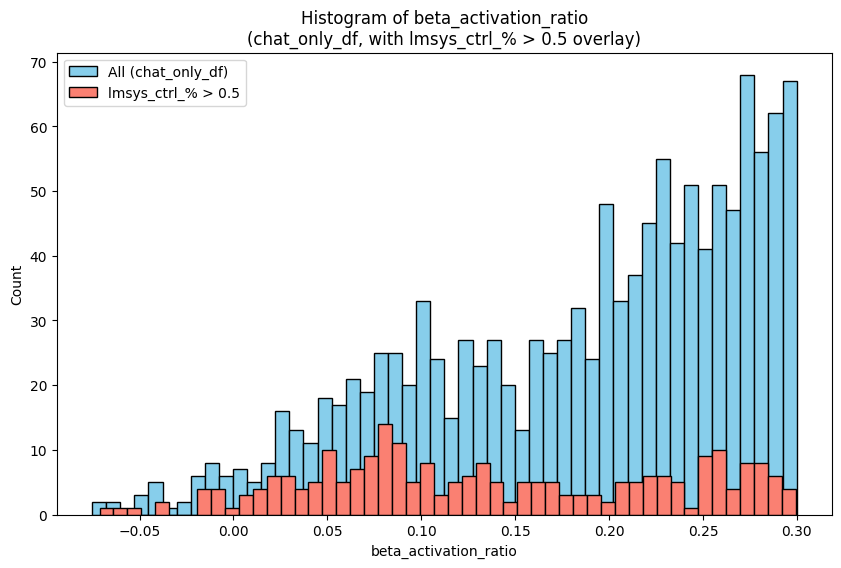

In [22]:
chat_only_df = df.query("-0.1 <beta_activation_ratio < 0.3")
import matplotlib.pyplot as plt

# Prepare masks
mask_ctrl = chat_only_df["lmsys_ctrl_%"] > 0.9

plt.figure(figsize=(10, 6))
# Plot for lmsys_ctrl_% > 0.5 (on top)

# Plot for all chat_only_df
plt.hist(
    chat_only_df["beta_activation_ratio"].dropna(),
    bins=50,
    color="skyblue",
    edgecolor="k",
    # alpha=0.5,
    label="All (chat_only_df)",
)
plt.hist(
    chat_only_df.loc[mask_ctrl, "beta_activation_ratio"].dropna(),
    bins=50,
    color="salmon",
    edgecolor="k",
    # alpha=0.7,
    label="lmsys_ctrl_% > 0.5",
)
plt.xlabel("beta_activation_ratio")
plt.ylabel("Count")
plt.title("Histogram of beta_activation_ratio\n(chat_only_df, with lmsys_ctrl_% > 0.5 overlay)")
plt.legend()
plt.show()



In [8]:
df["abs_act_ratio"] = df["beta_activation_ratio"].abs()
if not crosscoder.startswith("SAE"):
    head = df.query("tag == 'Chat only'").sort_values(by="beta_ratio_activation", ascending=True).head(15).filter(regex="(dec_norm_diff|lmsys_freq|lmsys_ctrl_%|beta.*)")
else:
    head = df.sort_values(by="abs_act_ratio", ascending=True).head(15)
head

,beta_activation_chat,beta_activation_base,beta_activation_ratio,abs_act_ratio
feature,,,,
61534,1.570466,-0.003411,-0.002172,0.002172
51142,3.130930,0.007413,0.002368,0.002368
36524,1.780896,0.006834,0.003838,0.003838
31819,2.072238,-0.008329,-0.004019,0.004019
47600,1.726954,0.006958,0.004029,0.004029
33910,3.141370,0.013369,0.004256,0.004256
50965,2.538914,0.011329,0.004462,0.004462
73641,1.463164,-0.006667,-0.004557,0.004557
50851,3.202220,-0.014802,-0.004622,0.004622


In [9]:
from tools.utils import offline_dashboard
db_path = Path("../results/quantile_examples")  # set to None to download from hub
off_dashboard = offline_dashboard(crosscoder, db_path=db_path)

# Online Feature Dashboard

In [6]:
import sys

sys.path.append("..")
from tools.utils import online_dashboard

online_dashboard(crosscoder).display()

# Inference demo

In [ ]:
from nnterp import load_model
from nnterp.nnsight_utils import get_layer_output, get_layer
from tools.utils import load_dictionary_model

base_model = load_model("google/gemma-2-2b", torch_dtype=th.bfloat16)
chat_model = load_model("google/gemma-2-2b-it", torch_dtype=th.bfloat16)
layer = 13
cc_device = "cuda:0" if th.cuda.is_available() else "cpu"
crosscoder = load_dictionary_model(crosscoder).to(cc_device)
sample_conv = [
    {"role": "user", "content": "Hello, how are you?"},
    {"role": "assistant", "content": "I am fine, thank you!"},
]
toks = chat_model.tokenizer.apply_chat_template(sample_conv, return_tensors="pt")
with base_model.trace(toks):
    base_acts = get_layer_output(base_model, layer).to(cc_device).save()
    get_layer(base_model, layer).output.stop()
with chat_model.trace(toks):
    chat_acts = get_layer_output(chat_model, layer).to(cc_device).save()
    get_layer(chat_model, layer).output.stop()

cc_input = th.stack(
    [
        base_acts.reshape(-1, base_acts.shape[-1]).to(cc_device),
        chat_acts.reshape(-1, chat_acts.shape[-1]).to(cc_device),
    ],
    dim=1,
).float()
print(cc_input.shape)  # (b * seq_len, 2, d)

cc_output = crosscoder(cc_input)

torch.Size([24, 2, 2304])
